<a href="https://colab.research.google.com/github/hatimdeve/python/blob/main/projetdatascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math

In [68]:
#1/import data
from google.colab import files
import io
uploaded =files.upload()

Saving hour.csv to hour (3).csv


In [69]:
df=pd.read_csv(io.BytesIO(uploaded['hour.csv']))
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [70]:
#2/prelim analysis and features selction
df_copy=df.copy()
df_prep=df_copy.drop(['instant','dteday','casual','registered'],axis=1)
df_prep.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

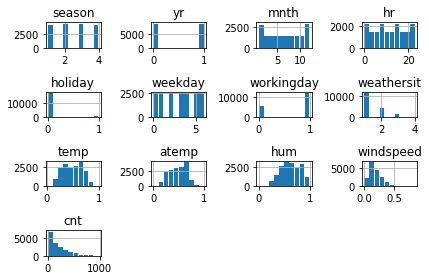

In [71]:
#create pandas hist
df_prep.hist(rwidth=0.9)
plt.tight_layout()

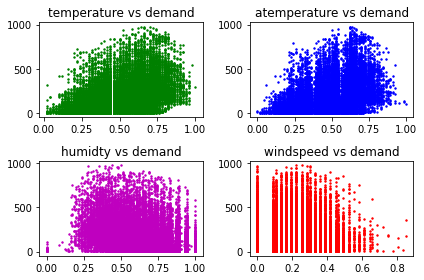

In [72]:
#3/ data visualisation
#visualise continous feature vs demand
plt.subplot(2,2,1)
plt.title("temperature vs demand")
plt.scatter(df_prep.temp,df_prep.cnt,s=2,c='g')

plt.subplot(2,2,2)
plt.title("atemperature vs demand")
plt.scatter(df_prep.atemp,df_prep.cnt,s=2,c='b')

plt.subplot(2,2,3)
plt.title("humidty vs demand")
plt.scatter(df_prep.hum,df_prep.cnt,s=2,c='m')

plt.subplot(2,2,4)
plt.title("windspeed vs demand")
plt.scatter(df_prep.windspeed,df_prep.cnt,s=2,c='r')
plt.tight_layout()

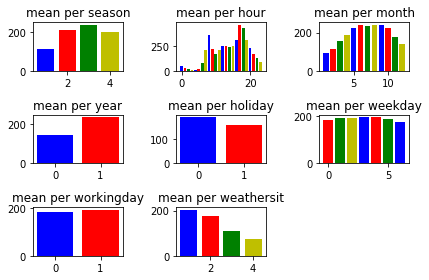

In [73]:
#visualise the categorical features
color=['b','r','g','y']
plt.subplot(3,3,1)
plt.title('mean per season')
season_list=df_prep.season.unique()
mean_season=df_prep.groupby('season')['cnt'].mean()
plt.bar(season_list,mean_season,color=color)

plt.subplot(3,3,2)
plt.title('mean per hour')
season_list=df_prep.hr.unique()
mean_season=df_prep.groupby('hr')['cnt'].mean()
plt.bar(season_list,mean_season,color=color)

plt.subplot(3,3,3)
plt.title('mean per month')
season_list=df_prep.mnth.unique()
mean_season=df_prep.groupby('mnth')['cnt'].mean()
plt.bar(season_list,mean_season,color=color)

plt.subplot(3,3,4)
plt.title('mean per year')
season_list=df_prep.yr.unique()
mean_season=df_prep.groupby('yr')['cnt'].mean()
plt.bar(season_list,mean_season,color=color)

plt.subplot(3,3,5)
plt.title('mean per holiday')
season_list=df_prep.holiday.unique()
mean_season=df_prep.groupby('holiday')['cnt'].mean()
plt.bar(season_list,mean_season,color=color)

plt.subplot(3,3,6)
plt.title('mean per weekday')
season_list=df_prep.weekday.unique()
mean_season=df_prep.groupby('weekday')['cnt'].mean()
plt.bar(season_list,mean_season,color=color)

plt.subplot(3,3,7)
plt.title('mean per workingday')
season_list=df_prep.workingday.unique()
mean_season=df_prep.groupby('workingday')['cnt'].mean()
plt.bar(season_list,mean_season,color=color)

plt.subplot(3,3,8)
plt.title('mean per weathersit')
season_list=df_prep.weathersit.unique()
mean_season=df_prep.groupby('weathersit')['cnt'].mean()
plt.bar(season_list,mean_season,color=color)
plt.tight_layout()

In [74]:
#check for outliers
df_prep.cnt.quantile([.05,.25,.5,.75,.99])

0.05      5.00
0.25     40.00
0.50    142.00
0.75    281.00
0.99    782.22
Name: cnt, dtype: float64

In [75]:
#4/check multiple linear rigression assumptions
#linearity using correlation 
correlation=df_prep[['temp','atemp','hum','windspeed','cnt']].corr()
correlation

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


In [76]:
#5/drop irrelivant features
df_prep=df_prep.drop(['weekday','workingday','yr','atemp','windspeed'],axis=1)

In [77]:
df_prep.head()

,season,mnth,hr,holiday,weathersit,temp,hum,cnt
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474795, 0.47049642, 0.49622893, 0.49404147, 0.46796018,
        0.47732133, 0.5267586 , 0.59145856, 0.65201694, 0.7151968 ,
        0.8059117 , 0.9253113 , 1.        , 0.9253113 , 0.8059117 ,
        0.7151968 , 0.65201694, 0.59145856, 0.5267586 , 0.47732133,
        0.46796018, 0.49404147, 0.49622893, 0.47049642, 0.45474795],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7fea55145710>)

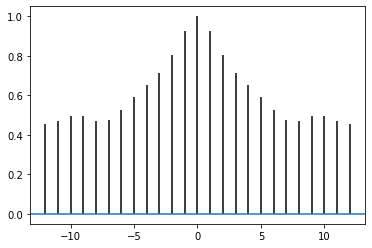

In [78]:
#autocorrelation of demand(cnt)
df1=pd.to_numeric(df_prep.cnt,downcast='float')
plt.acorr(df1,maxlags=12)

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

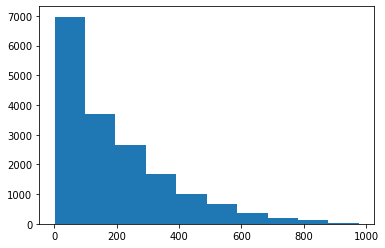

In [79]:

#6/create modify new feature
# log normilasethe feature 'demand'
plt.hist(df_prep.cnt)

(array([ 158.,  432.,  925., 1033., 1281., 1598., 2561., 4230., 3780.,
        1381.]),
 array([0.        , 0.68844867, 1.37689733, 2.065346  , 2.75379466,
        3.44224333, 4.13069199, 4.81914066, 5.50758932, 6.19603799,
        6.88448665]),
 <a list of 10 Patch objects>)

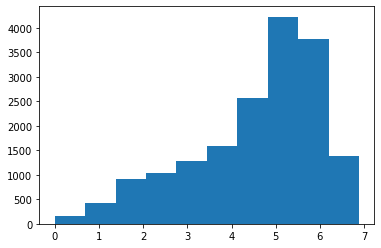

In [80]:
df_prep.cnt=np.log(df_prep.cnt)
plt.hist(df_prep.cnt)

In [81]:
#solve the problem of autocorrelaion
#shift the demand by 3 lags
t_1=df_prep.cnt.shift(+1).to_frame()
t_1.columns=['t_1']
t_2=df_prep.cnt.shift(+2).to_frame()
t_2.columns=['t_2']
t_3=df_prep.cnt.shift(+3).to_frame()
t_3.columns=['t_3']
df_prep1=pd.concat([df_prep,t_1,t_2,t_3],axis=1)
df_prep1.head()

,season,mnth,hr,holiday,weathersit,temp,hum,cnt,t_1,t_2,t_3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879


In [82]:
df_prep1=df_prep1.dropna()
df_prep1.head()

,season,mnth,hr,holiday,weathersit,temp,hum,cnt,t_1,t_2,t_3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [83]:
#7/dummy variables
df_prep1.dtypes

season          int64
mnth            int64
hr              int64
holiday         int64
weathersit      int64
temp          float64
hum           float64
cnt           float64
t_1           float64
t_2           float64
t_3           float64
dtype: object

In [84]:
df_prep1.season=df_prep1.season.astype('category')
df_prep1.mnth=df_prep1.mnth.astype('category')
df_prep1.hr=df_prep1.hr.astype('category')
df_prep1.holiday=df_prep1.holiday.astype('category')
df_prep1.weathersit=df_prep1.weathersit.astype('category')
df_prep1=pd.get_dummies(df_prep1,drop_first=True)
df_prep1.head()

,temp,hum,cnt,t_1,t_2,t_3,season_2,season_3,season_4,mnth_2,...,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,holiday_1,weathersit_2,weathersit_3,weathersit_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#8 create test and training data
#demand is time series type of data (autocorrelation)
y=df_prep1.cnt
x=df_prep1.drop(['cnt'],axis=1)

trainsize=0.7*len(x)
trainsize=int(trainsize)

xtrain=x.values[:trainsize]
xtest=x.values[trainsize:]

ytrain=y.values[:trainsize]
ytest=y.values[trainsize:]

In [90]:
#fit and score the model
from sklearn.linear_model import LinearRegression

In [91]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [92]:
r1=model.score(xtrain,ytrain)
r1

0.9195240591465778

In [95]:
r2=model.score(xtest,ytest)
r2

0.9287151360253385

In [104]:
predict=model.predict(xtest)
r=pd.DataFrame(predict,ytest)
r.head()

,0
3.583519,3.210018
2.397895,2.865005
1.945910,3.218456
3.091042,3.114121
3.951244,4.197920


In [107]:
from sklearn.metrics import mean_squared_error

In [108]:
fin=math.sqrt(mean_squared_error(ytest,predict))
fin

0.38098800498170443